In [2]:
import os
import requests
import pandas as pd
import numpy as np
import healpy as hp
import subprocess as sp
import ligo.skymap.plot
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.time import Time
from ligo.skymap.io import read_sky_map

In [17]:
r = requests.get("https://gcn.gsfc.nasa.gov/other/712991593.fermi").text
find_date = r.rfind("NOTICE_DATE:", 0, r.find("LOC_URL:"))
find_radius = r.rfind("GRB_ERROR:", 0, r.find("LOC_URL:"))
date = r[find_date+17:find_date+17+22]
radius = r[find_radius+17:find_radius+17+5]
print(date, radius)

Sun 06 Aug 23 07:54:22 2.32 


In [3]:
#getting data products link from GCN
basepath = "https://gcn.gsfc.nasa.gov/other/"
triggers = pd.DataFrame(pd.read_csv("/home/ravioli/astro/git/fermi_grbs/u_triggers_with_probs.csv"))
for trigger, name in zip(triggers['Trig_no'][1700:], triggers['GRBName'][1700:]):
    if not os.path.exists(f"/home/ravioli/astro/git/fermi_grbs/data/glg_healpix_all_{name}.fit_scheduled.csv"):
        r = requests.get(f"{basepath}/{trigger}.fermi").text
        date = r[r.rfind("NOTICE_DATE:")+17:r.rfind("NOTICE_DATE:")+39]
        tile_cmd = f"python3 program_for_emgw_mapping.py -input_file /home/ravioli/astro/git/fermi_grbs/data/glg_healpix_all_{name}.fit -time '{date}' -trig_no {trigger}"
        print(name, trigger, date)
        print(os.system(tile_cmd))
    else:
        print("Already done")

Already done
Already done
256
bn230520966 706317104 Sat 20 May 23 23:20:55
Already done
Already done
Already done
Already done
256
bn230524357 706610076 Wed 24 May 23 09:03:31
Already done
Already done
Already done
Already done
Already done
Already done
256
bn230614009 708394340 Wed 14 Jun 23 00:21:31
Already done
Already done
Already done
Already done
256
bn230621990 709083929 Thu 22 Jun 23 01:41:58
Already done
Already done
256
bn230628067 709608965 Wed 28 Jun 23 02:02:20
Already done
Already done
256
bn230701025 709864601 Sat 01 Jul 23 00:46:02
Already done
Already done
256
bn230703954 710117592 Mon 03 Jul 23 23:39:31
Already done
Already done
Already done
Already done
Already done
Already done
Already done
256
bn230712027 710815158 Wed 12 Jul 23 00:48:38
Already done
256
bn230713999 710985550 Fri 14 Jul 23 00:08:27
256
bn230715072 711078200 Sat 15 Jul 23 01:52:25
Already done
Already done
Already done
Already done
Already done
256
bn230724049 711853834 Mon 24 Jul 23 01:19:38
Alread

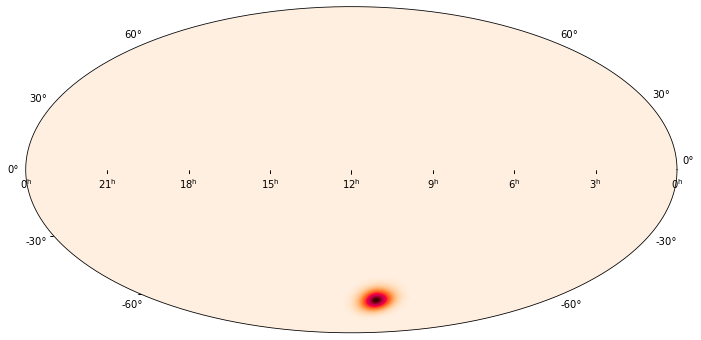

In [4]:
skymap = read_sky_map("/home/ravioli/astro/git/fermi_grbs/data/glg_healpix_all_bn230803061.fit")
hpmap = skymap[0]

fig, axes = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'projection': 'astro hours mollweide'})
axes.imshow_hpx(hpmap, cmap='cylon')

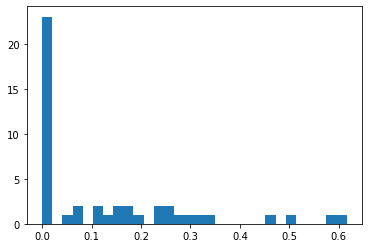

In [8]:
coverage = pd.DataFrame(pd.read_csv("/home/ravioli/astro/git/fermi_grbs/coverage.csv"))
plt.hist(coverage['coverage'], bins=30)
plt.show()